In [1]:
# Loading packages
from google.colab import drive
import os
from torchvision import transforms 
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
import torch.optim as optim
import random
from tqdm.notebook import tqdm
import numpy as np

# Also, as we have a auxiliar python file with function, we go to use it
from cnn_functions import *

In [2]:
# As our dataset is mounted in Google Drive, we need to get access to it.
drive.mount('/content/drive')

# Dataset path. You should change the dataset path to the location that you place the data.
data_dir = '/content/drive/MyDrive/DeepLearning/dataset/'
classes = os.listdir(data_dir)

Mounted at /content/drive


In [3]:
# Performing Image Transformations. 
train_transform = transforms.Compose([
            transforms.Resize(256),
            transforms.RandomHorizontalFlip(),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

In [4]:
# Checking the dataset training size
dataset = ImageFolder(data_dir, transform=train_transform)
print('Size of training dataset :', len(dataset))

Size of training dataset : 5400


In [5]:
# Viewing one of images shape
img, label = dataset[100]
print(img.shape)

torch.Size([3, 224, 224])


In [6]:
# Setting seed so that value won't change everytime
# Splitting the dataset to training, validation, and testing category
torch.manual_seed(1)
val_size = len(dataset)//20
test_size = len(dataset)//10
train_size = len(dataset) - val_size - test_size

In [7]:
# Random Splitting
train_ds, val_ds, test_ds = random_split(dataset, [train_size, val_size, test_size])
# Check the size of each dataset
len(train_ds), len(val_ds),len(test_ds)  

(4590, 270, 540)

In [8]:
# Define batch size
batch_size = 12
# Define a generator of random values
g_cpu = torch.Generator()
g_cpu.manual_seed(123)
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True,generator  = g_cpu)
val_loader = DataLoader(val_ds, batch_size, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size, num_workers=2, pin_memory=True)

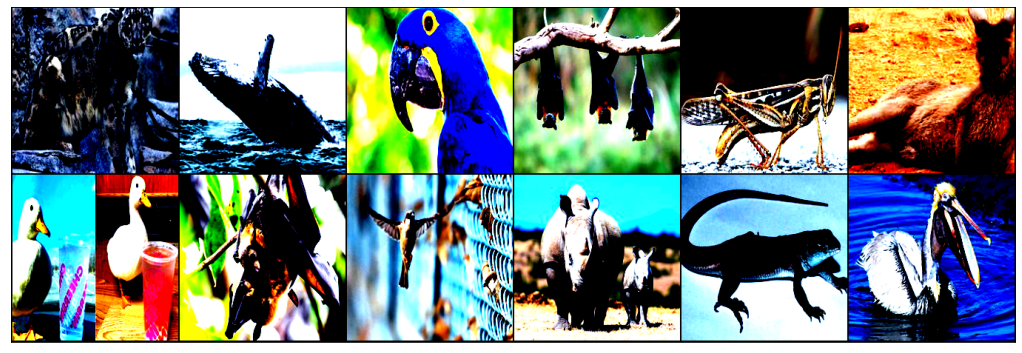

In [9]:
# We can see some of these images available in one batch
for images, labels in train_loader:
    fig, ax = plt.subplots(figsize=(18,10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=6).permute(1, 2, 0))
    break

In [10]:
# Now, we go to consider some parameters to start to create our models
input_size = torch.randn(1, 3, 224, 224)
output_size = 90

# Pass our data to GPU
device = get_default_device()
device
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

# **Create Resnet101 Model**

In [11]:
model_resnet101 = torch.hub.load('pytorch/vision:v0.10.0', 'resnet101', pretrained=False)
model_resnet101.fc = nn.Linear(2048,90)
model_resnet101.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [12]:
# Reporting the Flops of this model
print_model_parm_flops(model_resnet101,input_size, detail=False)

 + Number of FLOPs: 15.61G


# **Resnet101, Loss function: Cross entropy, Optimizer: SGD, learning rate:0.01, epochs:20**

In [13]:
cnn_sgd_lr001_performance = fit_model(model_resnet101,train_loader = train_loader,val_loader = val_loader,test_loader =test_loader,optimization = 'SGD',loss_function = 'Cross-entropy',epochs = 20,learning_rate = 0.01)

  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.963


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.410


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.212


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.088


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.974


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.891


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.792


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.723


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.615


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.516


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.424


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.379


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.308


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.168


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.088


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.010


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.896


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.799


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.697


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.525
Finished Training


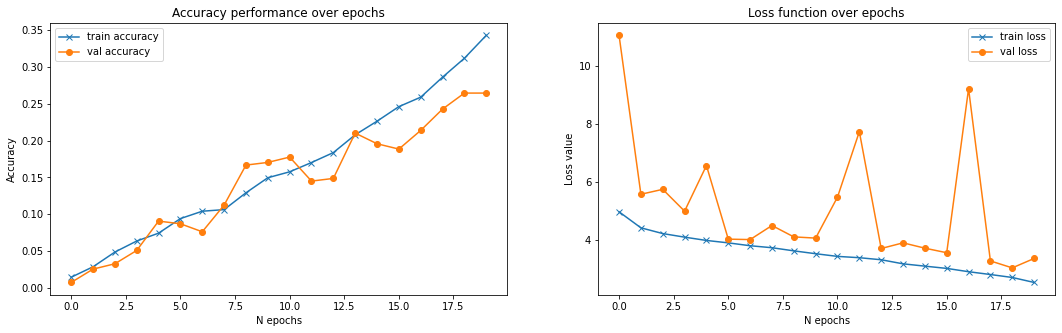

In [14]:
# Plot results
plot_performance(cnn_sgd_lr001_performance[1],cnn_sgd_lr001_performance[2])

In [15]:
# Reporting test accuracy
print(f'Accuracy in testing is: {cnn_sgd_lr001_performance[3][0].cpu()}')

Accuracy in testing is: 0.28518521785736084


# **ResNet101, Loss function: Cross entropy, Optimizer: SGD, learning rate:0.001, epochs:20**

In [16]:
model_resnet101 = torch.hub.load('pytorch/vision:v0.10.0', 'resnet101', pretrained=False)
model_resnet101.fc = nn.Linear(2048,90)
model_resnet101.eval()
cnn_sdg_lr01_performance = fit_model(model_resnet101,train_loader = train_loader,val_loader = val_loader,test_loader =test_loader,optimization = 'SGD',loss_function = 'Cross-entropy',epochs = 20,learning_rate = 0.001)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.809


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.567


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.374


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.259


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.171


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.070


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.016


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.936


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.859


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.785


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.693


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.617


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.535


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.469


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.397


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.289


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.245


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.169


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.110


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.034
Finished Training


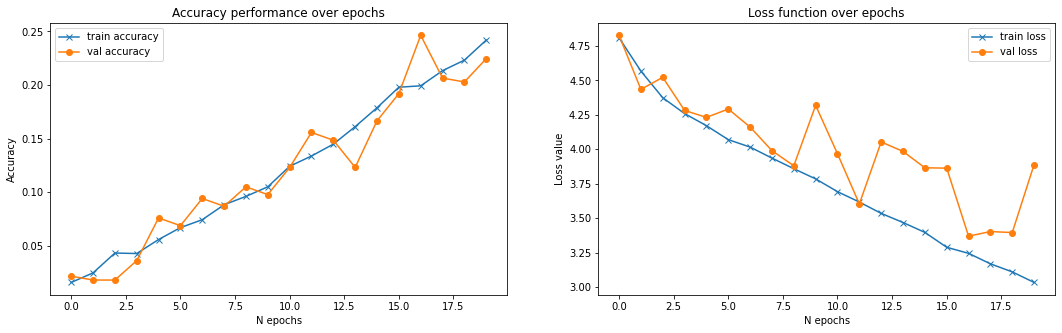

In [17]:
# Plot results
plot_performance(cnn_sdg_lr01_performance[1],cnn_sdg_lr01_performance[2])

In [18]:
# Reporting test accuracy
print(f'Accuracy in testing is: {cnn_sdg_lr01_performance[3][0].cpu()}')

Accuracy in testing is: 0.2074073851108551


# **ResNet101, Loss function: Cross entropy, Optimizer: Adam, learning rate:0.01, epochs:20**

In [19]:
model_resnet101 = torch.hub.load('pytorch/vision:v0.10.0', 'resnet101', pretrained=False)
model_resnet101.fc = nn.Linear(2048,90)
model_resnet101.eval()
cnn_adam_lr001_performance = fit_model(model_resnet101,train_loader = train_loader,val_loader = val_loader,test_loader =test_loader,optimization = 'Adam',loss_function = 'Cross-entropy',epochs = 20,learning_rate = 0.01)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.952


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.464


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.415


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.364


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.360


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.305


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.287


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.204


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.136


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.107


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.069


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.059


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.042


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.013


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.995


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.985


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.951


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.910


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.893


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.874
Finished Training


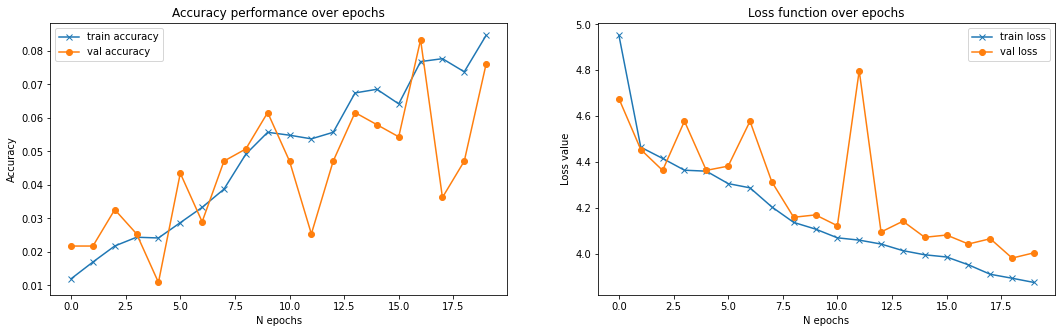

In [20]:
# Plot results
plot_performance(cnn_adam_lr001_performance[1],cnn_adam_lr001_performance[2])

In [21]:
# Reporting test accuracy
print(f'Accuracy in testing is: {cnn_adam_lr001_performance[3][0].cpu()}')

Accuracy in testing is: 0.09074074774980545


# **ResNet101, Loss function: Cross entropy, Optimizer: Adam, learning rate:0.001, epochs:20**

In [22]:
model_resnet101 = torch.hub.load('pytorch/vision:v0.10.0', 'resnet101', pretrained=False)
model_resnet101.fc = nn.Linear(2048,90)
model_resnet101.eval()
cnn_adam_lr01_performance = fit_model(model_resnet101,train_loader = train_loader,val_loader = val_loader,test_loader =test_loader,optimization = 'Adam',loss_function = 'Cross-entropy',epochs = 20,learning_rate = 0.001)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.648


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.365


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.213


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.105


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.020


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.917


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.829


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.899


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.780


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.676


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.587


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.568


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.429


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.354


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.253


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.147


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.068


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.937


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.778


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.684
Finished Training


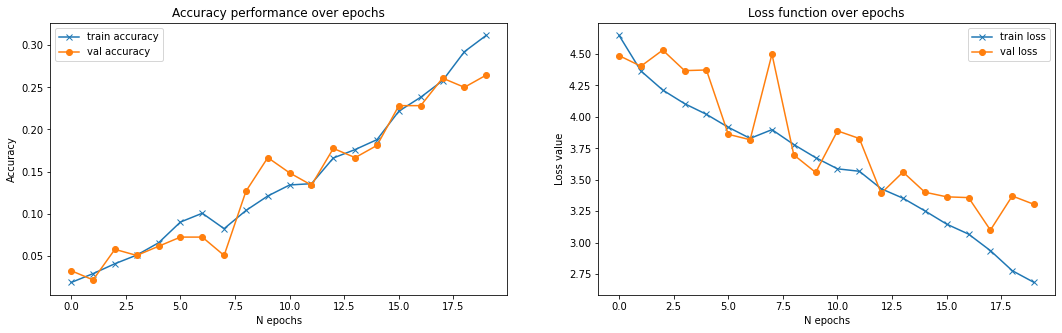

In [23]:
# Plot results
plot_performance(cnn_adam_lr01_performance[1],cnn_adam_lr01_performance[2])

In [24]:
# Reporting test accuracy
print(f'Accuracy in testing is: {cnn_adam_lr01_performance[3][0].cpu()}')

Accuracy in testing is: 0.26851850748062134


# **ResNet101 pretrained Model**

In [25]:
model_resnet101_pt = torch.hub.load('pytorch/vision:v0.10.0', 'resnet101', pretrained=True)
model_resnet101_pt.fc = nn.Linear(2048,90)
model_resnet101_pt.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

# **Resnet101 pretrained, Loss function: Cross entropy, Optimizer: SGD, learning rate:0.01, epochs:20**

In [26]:
model_resnet101_pt = torch.hub.load('pytorch/vision:v0.10.0', 'resnet101', pretrained=True)
model_resnet101_pt.fc = nn.Linear(2048,90)
model_resnet101_pt.eval()
cnn_sgd_lr001_performance = fit_model(model_resnet101_pt,train_loader = train_loader,val_loader = val_loader,test_loader =test_loader,optimization = 'SGD',loss_function = 'Cross-entropy',epochs = 20,learning_rate = 0.01)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.315


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.864


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.276


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.963


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.718


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.609


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.466


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.343


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.313


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.246


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.190


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.182


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.153


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.121


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.095


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.090


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.097


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.080


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.066


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.069
Finished Training


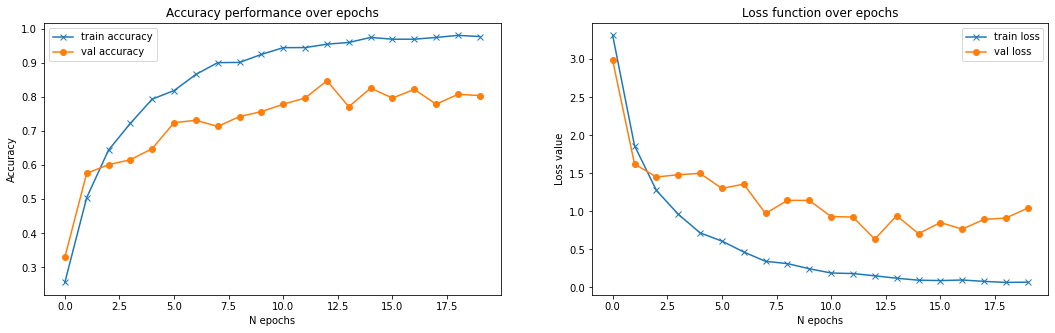

In [27]:
# Plot results
plot_performance(cnn_sgd_lr001_performance[1],cnn_sgd_lr001_performance[2])

In [28]:
# Reporting test accuracy
print(f'Accuracy in testing is: {cnn_sgd_lr001_performance[3][0].cpu()}')

Accuracy in testing is: 0.7851850986480713


# **ResNet101 pretrained, Loss function: Cross entropy, Optimizer: SGD, learning rate:0.001, epochs:20**

In [29]:
model_resnet101_pt = torch.hub.load('pytorch/vision:v0.10.0', 'resnet101', pretrained=True)
model_resnet101_pt.fc = nn.Linear(2048,90)
model_resnet101_pt.eval()
cnn_sdg_lr01_performance = fit_model(model_resnet101_pt,train_loader = train_loader,val_loader = val_loader,test_loader =test_loader,optimization = 'SGD',loss_function = 'Cross-entropy',epochs = 20,learning_rate = 0.001)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.273


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.583


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.259


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.143


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.094


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.060


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.048


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.042


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.032


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.028


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.022


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.021


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.016


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.015


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.016


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.013


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.011


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.011


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.010


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.010
Finished Training


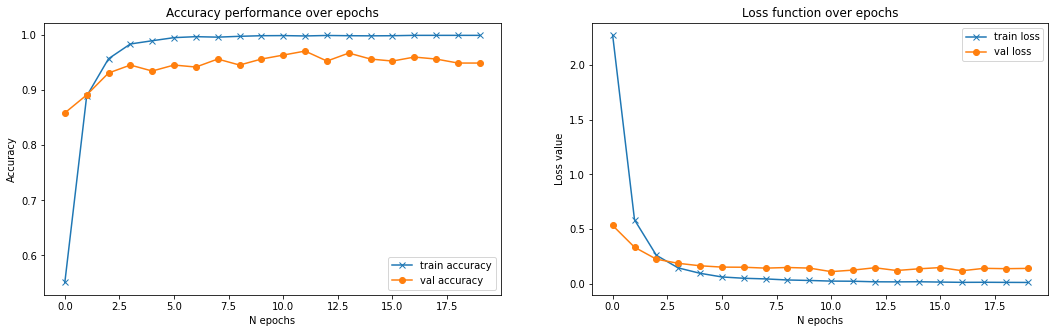

In [30]:
# Plot results
plot_performance(cnn_sdg_lr01_performance[1],cnn_sdg_lr01_performance[2])

In [31]:
# Reporting test accuracy
print(f'Accuracy in testing is: {cnn_sdg_lr01_performance[3][0].cpu()}')

Accuracy in testing is: 0.9500000476837158


# **ResNet101 pretrained, Loss function: Cross entropy, Optimizer: Adam, learning rate:0.01, epochs:20**

In [32]:
model_resnet101_pt = torch.hub.load('pytorch/vision:v0.10.0', 'resnet101', pretrained=True)
model_resnet101_pt.fc = nn.Linear(2048,90)
model_resnet101_pt.eval()
cnn_adam_lr001_performance = fit_model(model_resnet101_pt,train_loader = train_loader,val_loader = val_loader,test_loader =test_loader,optimization = 'Adam',loss_function = 'Cross-entropy',epochs = 20,learning_rate = 0.01)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.642


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.512


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.488


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.456


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.442


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.455


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.414


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.377


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.340


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.245


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.192


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.145


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.102


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.040


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.981


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.923


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.857


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.798


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.784


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.727
Finished Training


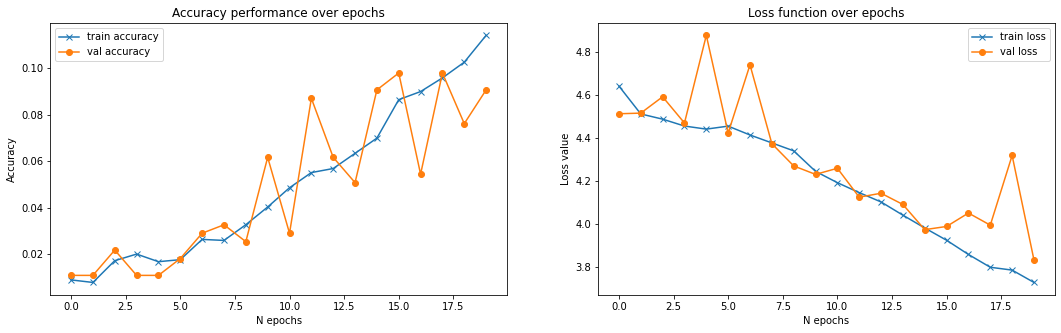

In [33]:
# Plot results
plot_performance(cnn_adam_lr001_performance[1],cnn_adam_lr001_performance[2])

In [34]:
# Reporting test accuracy
print(f'Accuracy in testing is: {cnn_adam_lr001_performance[3][0].cpu()}')

Accuracy in testing is: 0.10925925523042679


# **ResNet101 pretrained, Loss function: Cross entropy, Optimizer: Adam, learning rate:0.001, epochs:20**

In [35]:
model_resnet101_pt = torch.hub.load('pytorch/vision:v0.10.0', 'resnet101', pretrained=True)
model_resnet101_pt.fc = nn.Linear(2048,90)
model_resnet101_pt.eval()
cnn_adam_lr01_performance = fit_model(model_resnet101_pt,train_loader = train_loader,val_loader = val_loader,test_loader =test_loader,optimization = 'Adam',loss_function = 'Cross-entropy',epochs = 20,learning_rate = 0.001)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.483


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.099


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.878


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.692


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.497


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.290


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.232


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.072


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.932


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.704


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.597


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.396


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.250


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.193


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.985


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.799


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.668


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.486


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.390


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.180
Finished Training


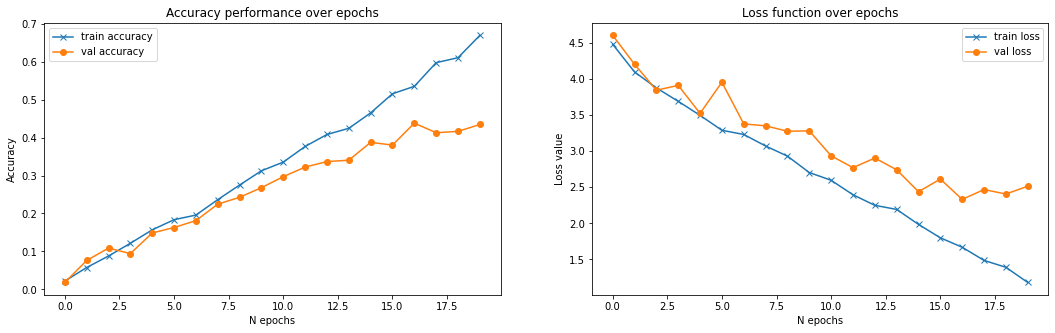

In [36]:
# Plot results
plot_performance(cnn_adam_lr01_performance[1],cnn_adam_lr01_performance[2])

In [37]:
# Reporting test accuracy
print(f'Accuracy in testing is: {cnn_adam_lr01_performance[3][0].cpu()}')

Accuracy in testing is: 0.45370370149612427
